<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_04_Big_Mac_Index_in_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=8>The Big Mac Economic Index</font>
***

## An economic indicator?

The dataset has prices over time of the popular MacDonalds sandwich. The idea is that because you can get it around the world it serves as an interesting economic indicator. This dataset was created by [TheEconomist] and contains more than 7000 Big Mac prices along with Country & Date and other features.

source: https://www.kaggle.com/yamqwe/the-big-mac-economic-index
***

# <font color=green>1- Data import</font>
***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Estudos e jobs/big-mac-full-index.csv')

In [ ]:
dados

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000e+00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000e+00,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000e+00,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.470000e+00,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.700000e+00,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2021-07-01,URY,UYU,Uruguay,225.00,4.400000e+01,5.113636,-0.09493,0.01813,0.07646,0.44146,0.47923,15777.96,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178
1516,2021-07-01,USA,USD,United States,5.65,1.000000e+00,5.650000,0.00000,0.12492,0.18937,0.59265,0.63439,63415.99,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378
1517,2021-07-01,VEN,VES,Venezuela,30164100.00,3.613989e+06,8.346483,0.47725,0.66179,0.75700,1.35275,1.41441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,2021-07-01,VNM,VND,Vietnam,69000.00,2.302850e+04,2.996287,-0.46968,-0.40344,-0.36926,-0.15539,-0.13326,3498.98,3.056909,-0.05846,-0.13770,-0.06799,0.24518,-0.05491


# <font color=green>2- Data analysis</font>
***

### 2.1- DataFrame analysis

In [ ]:
dados.shape

(1520, 19)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1520 non-null   object 
 1   iso_a3         1520 non-null   object 
 2   currency_code  1520 non-null   object 
 3   name           1520 non-null   object 
 4   local_price    1520 non-null   float64
 5   dollar_ex      1520 non-null   float64
 6   dollar_price   1520 non-null   float64
 7   USD_raw        1520 non-null   float64
 8   EUR_raw        1520 non-null   float64
 9   GBP_raw        1520 non-null   float64
 10  JPY_raw        1520 non-null   float64
 11  CNY_raw        1520 non-null   float64
 12  GDP_dollar     812 non-null    float64
 13  adj_price      812 non-null    float64
 14  USD_adjusted   812 non-null    float64
 15  EUR_adjusted   812 non-null    float64
 16  GBP_adjusted   812 non-null    float64
 17  JPY_adjusted   812 non-null    float64
 18  CNY_adju

In [ ]:
dados['name'].drop_duplicates()

0                  Argentina
1                  Australia
2                     Brazil
3                     Canada
4                Switzerland
5                      Chile
6                      China
7             Czech Republic
8                    Denmark
9                  Euro area
10                   Britain
11                 Hong Kong
12                   Hungary
13                 Indonesia
14                    Israel
15                     Japan
16               South Korea
17                    Mexico
18                  Malaysia
19               New Zealand
20                    Poland
21                    Russia
22                 Singapore
23                    Sweden
24                  Thailand
25                    Taiwan
26             United States
27              South Africa
47               Philippines
75                    Norway
77                      Peru
84                    Turkey
87                 Venezuela
98                     Egypt
128           

### 2.2- Brazilian data

In [ ]:
brasil = ['Brazil']
selecao = dados['name'].isin(brasil)
dados_2 = dados[selecao]
dados_2.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2001-04-01,BRA,BRL,Brazil,3.60,2.19,1.643836,-0.35282,-0.27315,-0.42234,-0.30668,0.37484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2002-04-01,BRA,BRL,Brazil,3.60,2.34,1.538462,-0.38214,-0.35258,-0.46683,-0.23664,0.21319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,2003-04-01,BRA,BRL,Brazil,4.55,3.07,1.482085,-0.45311,-0.50282,-0.52863,-0.32118,0.23956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2004-05-01,BRA,BRL,Brazil,5.40,3.18,1.698113,-0.41444,-0.48354,-0.49539,-0.26761,0.35196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2.1- price evolution since 2000, in dollars

In [ ]:
datas = dados_2.date
valores = dados_2['dollar_price']

Text(0, 0.5, 'USD unity prices')

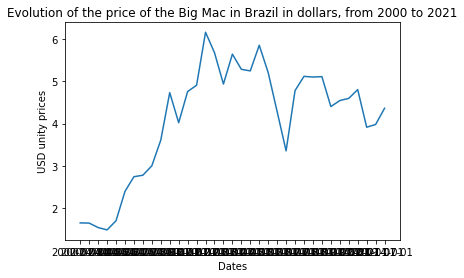

In [ ]:
plt.plot(datas, valores)

plt.title('Evolution of the price of the Big Mac in Brazil in dollars, from 2000 to 2021')
plt.xlabel('Dates')
plt.ylabel('USD unity prices')

In [ ]:
primeiro_valor = dados.iloc[2,6]
ultimo_valor = dados.iloc[1468,6]
variacao = ultimo_valor * 100 / primeiro_valor
print('Variation in the value of the Big Mac in the period: ',variacao.round(2),'%')

Variation in the value of the Big Mac in the period:  264.74 %


#### <font color='red'>Conclusion: the value of the Big Mac increased by 264%, roughly following the inflation for the period, equal to 250% (IPCA)</font>

### 2.3- Top 5 most expensive Bic Mac in the World

In [ ]:
data_escolhida = ['2021-07-01']
selecao = dados['date'].isin(data_escolhida)
dados_3 = dados[selecao]
dados_3.sort_values(['dollar_price'],ascending=False).head(33)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
1517,2021-07-01,VEN,VES,Venezuela,30164100.00,3.613989e+06,8.346483,0.47725,0.66179,0.75700,1.35275,1.41441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1470,2021-07-01,CHE,CHF,Switzerland,6.50,9.227500e-01,7.044161,0.24675,0.40250,0.48285,0.98564,1.03768,86849.47000,6.354372,0.06486,-0.02475,0.05409,0.40828,0.06888
1498,2021-07-01,NOR,NOK,Norway,57.00,9.044400e+00,6.302242,0.11544,0.25478,0.32667,0.77651,0.82306,67176.43000,5.576079,0.08568,-0.00568,0.07470,0.43581,0.08978
1510,2021-07-01,SWE,SEK,Sweden,54.00,8.716500e+00,6.195147,0.09649,0.23346,0.30413,0.74632,0.79208,51796.38000,4.967623,0.19795,0.09714,0.18583,0.58429,0.20248
1516,2021-07-01,USA,USD,United States,5.65,1.000000e+00,5.650000,0.00000,0.12492,0.18937,0.59265,0.63439,63415.99000,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378
1469,2021-07-01,CAN,CAD,Canada,6.77,1.274100e+00,5.313555,-0.05955,0.05793,0.11855,0.49781,0.53706,43278.22000,4.630632,0.10225,0.00949,0.09110,0.45773,0.10642
1487,2021-07-01,ISR,ILS,Israel,17.00,3.292050e+00,5.163956,-0.08603,0.02815,0.08705,0.45564,0.49379,43688.58000,4.646867,0.06748,-0.02236,0.05668,0.41174,0.07151
1515,2021-07-01,URY,UYU,Uruguay,225.00,4.400000e+01,5.113636,-0.09493,0.01813,0.07646,0.44146,0.47923,15777.96000,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178
1478,2021-07-01,EUZ,EUR,Euro area,4.27,8.501594e-01,5.022588,-0.11105,0.00000,0.05729,0.41579,0.45290,37918.91884,4.418611,0.09189,0.00000,0.08084,0.44402,0.09601
1465,2021-07-01,AUS,AUD,Australia,6.55,1.366587e+00,4.792962,-0.15169,-0.04572,0.00896,0.35106,0.38647,52824.82000,5.008309,-0.08072,-0.15808,-0.09002,0.21575,-0.07724


#### <font color='red'>Conclusion: Top 5:

1.   Venezuela
2.   Switzerland
3.   Norway
4.   Sweden
5.   USA</font>

### 2.4- Top 5 cheapiest Bic Mac in the World

In [ ]:
dados_3.sort_values(['dollar_price'],ascending=True).head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
1492,2021-07-01,LBN,LBP,Lebanon,37000.00,22000.00000,1.681818,-0.70233,-0.66515,-0.64596,-0.52592,-0.51350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1507,2021-07-01,RUS,RUB,Russia,169.00,74.53000,2.267543,-0.59866,-0.54853,-0.52266,-0.36081,-0.34406,10037.24,3.315572,-0.34305,-0.39833,-0.34969,-0.13118,-0.34057
1519,2021-07-01,ZAF,ZAR,South Africa,33.50,14.66250,2.284740,-0.59562,-0.54511,-0.51904,-0.35597,-0.33909,5067.15,3.118948,-0.29634,-0.35555,-0.30346,-0.06941,-0.29368
1466,2021-07-01,AZE,AZN,Azerbaijan,3.95,1.69900,2.324897,-0.58851,-0.53711,-0.51059,-0.34465,-0.32747,4218.00,3.085355,-0.27617,-0.33709,-0.28350,-0.04274,-0.27344
1512,2021-07-01,TUR,TRY,Turkey,19.99,8.55725,2.336031,-0.58654,-0.53489,-0.50825,-0.34151,-0.32425,8548.18,3.256663,-0.31096,-0.36895,-0.31793,-0.08875,-0.30836


#### <font color='red'>Conclusion: Top 5:

1.   Lebanon
2.   Russia
3.   South Africa
4.   Azerbaijan
5.   Turkey</font>

### 2.5- What is the position occupied by China?

In [ ]:
dados_4 = dados_3.sort_values(['dollar_price'],ascending=False)

In [ ]:
j = dados_4.shape[0] #verificar quantos países há no dataframe

In [ ]:
i = 0

while dados_4.iloc[i, 3] != 'China':
  i += 1

z = i + 1 #corrigir a indexação do Python

china = dados_4.iloc[i, 3] #conferir se china é China

print("China's position at this ranking is: %s de %s." %(z,j))

China's position at this ranking is: 33 de 57.
